# Classification

In this notebook I will be compiling a number of different classification methods, and comparing their results for a asingle data set. The data set I will be suing for this notebook reflects customer data for a car dealership. The car dealership was attempting to sell an SUV, and has collected data reflecting whether a purchase was made, as well as the age, estimated salary, gender, and the user ID of the customers. I want to see which algorithm best classifies the data, and produces the most accurate predictions on the set. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

## Logistic Regression

### Data Import and Exploratory Analysis

In [2]:
data = pd.read_csv("../Data/Social_Network_Ads.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null float64
EstimatedSalary    400 non-null float64
Purchased          400 non-null int64
dtypes: float64(2), int64(2), object(1)
memory usage: 15.7+ KB


In [4]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


The data seen above is the head of the data set being used in this analysis. From this and the info we can see that the user id is a unique key, and therefore not useful for any classification or predictive analysis, so it will be excluded from the working data set (X) below. 

I'll be changing the gender variable to a dummy, so we can use it in analysis. Although I'll be creating models to compare the effect of including gender, the visualizations in this notebook are strictly two dimensional, and will be created on the models which only include Age and EstimatedSalary in the prediictive formula. 

In [5]:
data = pd.get_dummies(data, drop_first=True)
data = data[["User ID", "Age", "EstimatedSalary", "Gender_Male", "Purchased"]]

In [6]:
data.head()

,User ID,Age,EstimatedSalary,Gender_Male,Purchased
0,15624510,19.0,19000.0,1,0
1,15810944,35.0,20000.0,1,0
2,15668575,26.0,43000.0,0,0
3,15603246,27.0,57000.0,0,0
4,15804002,19.0,76000.0,1,0


In [7]:
X = data.iloc[:, 1:4]
y = data.iloc[:, -1]

### Train Test Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 84)

### Feature Scaling

For this data set we only need to scale the the independant variables, so I'll only be creating a scaler on the X_train set and transforming the independant sets as a whole. 

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scal_x = StandardScaler()

In [12]:
Male_train = X_train["Gender_Male"]
Male_test = X_test["Gender_Male"]

In [13]:
X_train = X_train.drop("Gender_Male", axis = 1)
X_test = X_test.drop("Gender_Male", axis = 1)

In [14]:
X_train = pd.DataFrame(scal_x.fit_transform(X_train), columns = ["Age", "EstimatedSalary"])

In [15]:
X_train.insert(2, column = "Gender_Male", value = Male_train.values)

In [16]:
X_train.head()

,Age,EstimatedSalary,Gender_Male
0,-0.295490,-0.221478,1
1,0.956643,-1.051490,1
2,-0.969715,-0.932916,0
3,0.186100,-0.340051,1
4,-0.199172,-0.488267,1


In [17]:
X_test = pd.DataFrame(scal_x.transform(X_test), columns = ["Age", "EstimatedSalary"])
X_test.insert(2, column = "Gender_Male", value = Male_test.values)

In [18]:
X_test.head()

,Age,EstimatedSalary,Gender_Male
0,-1.258669,0.341745,1
1,0.282418,0.104598,0
2,-0.873397,0.430675,0
3,-1.066033,0.816037,0
4,-1.066033,0.608534,1


### Fitting the model

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
classif = LogisticRegression(random_state = 168)

In [21]:
classif.fit(X_train, y_train)

/home/anna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=168, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Predictions

In [22]:
from sklearn.metrics import classification_report

In [23]:
preds = classif.predict(X_test)
preds[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [24]:
pd.crosstab(y_test, preds)

col_0,0,1
Purchased,,
0,74,8
1,9,29


In [25]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90        82
           1       0.78      0.76      0.77        38

    accuracy                           0.86       120
   macro avg       0.84      0.83      0.84       120
weighted avg       0.86      0.86      0.86       120



### Visualizing the Model

I can't plot the model above in 2D, as I've included Gender in the model. As such, to plot any version of the model in 2d, I need to restrict my model to two variables. As such, below I've plotted the model which only considers age and estimated salaries as the independant variables. 

First, lets review the fit of the model we will be plotting below.

In [26]:
classif_nogen = LogisticRegression(random_state = 168)

In [27]:
classif_nogen.fit(X_train.iloc[:,:2], y_train)

/home/anna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=168, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
preds = classif_nogen.predict(X_test.iloc[:,:2])
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        82
           1       0.76      0.76      0.76        38

    accuracy                           0.85       120
   macro avg       0.83      0.83      0.83       120
weighted avg       0.85      0.85      0.85       120



In [29]:
pd.crosstab(y_test, preds)

col_0,0,1
Purchased,,
0,73,9
1,9,29


The model seen above is only nominally worse than the model containing gender. As such, we will continue to plot the model below.

#### Visualizing the Training Set

In [30]:
from mlxtend.plotting import plot_decision_regions

Text(0.5, 1.0, 'Logistic Regression on Age and Estimated Salary (Training Set)')

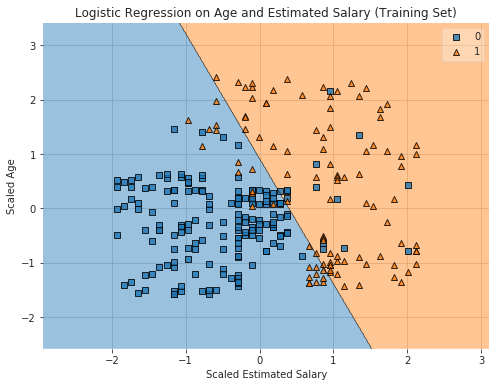

In [52]:
plt.figure(figsize = (8,6))
plot_decision_regions(np.array(X_train.iloc[:,:2]), np.array(y_train), clf = classif_nogen)
plt.xlabel("Scaled Estimated Salary")
plt.ylabel("Scaled Age")
plt.title("Logistic Regression on Age and Estimated Salary (Training Set)")

#### Visualizing the Test Set

Text(0.5, 1.0, 'Logistic Regression on Age and Estimated Salary (Test Set)')

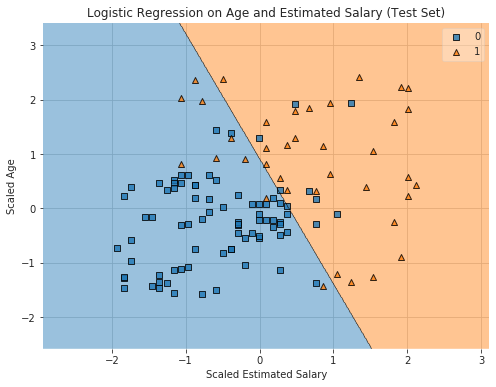

In [31]:
plt.figure(figsize = (8,6))
plot_decision_regions(np.array(X_test.iloc[:,:2]), np.array(y_test), clf = classif_nogen)
plt.xlabel("Scaled Estimated Salary")
plt.ylabel("Scaled Age")
plt.title("Logistic Regression on Age and Estimated Salary (Test Set)")

## KNN - K Nearest Neighbors

I'll be using the same data as in the logistic regression, which is still innitialized as data, with gender reset as a dummy variable.

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Age                400 non-null float64
EstimatedSalary    400 non-null float64
Gender_Male        400 non-null uint8
Purchased          400 non-null int64
dtypes: float64(2), int64(2), uint8(1)
memory usage: 13.0 KB


In [33]:
data.head()

,User ID,Age,EstimatedSalary,Gender_Male,Purchased
0,15624510,19.0,19000.0,1,0
1,15810944,35.0,20000.0,1,0
2,15668575,26.0,43000.0,0,0
3,15603246,27.0,57000.0,0,0
4,15804002,19.0,76000.0,1,0


In [34]:
X = data.iloc[:,1:4]
y = data.iloc[:,-1]

### Train Test Split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 84)

### Feature Scaling

In [36]:
scal_x = StandardScaler()

In [37]:
Male_train = X_train["Gender_Male"]
Male_test = X_test["Gender_Male"]

In [38]:
X_train = X_train.drop("Gender_Male", axis = 1)
X_test = X_test.drop("Gender_Male", axis = 1)

In [39]:
X_train = pd.DataFrame(scal_x.fit_transform(X_train), columns = ["Age", "EstimatedSalary"])
X_train.insert(2, column = "Gender_Male", value = Male_train.values)
X_train.head()

,Age,EstimatedSalary,Gender_Male
0,-0.295490,-0.221478,1
1,0.956643,-1.051490,1
2,-0.969715,-0.932916,0
3,0.186100,-0.340051,1
4,-0.199172,-0.488267,1


In [40]:
X_test = pd.DataFrame(scal_x.transform(X_test), columns = ["Age", "EstimatedSalary"])
X_test.insert(2, column = "Gender_Male", value = Male_test.values)
X_test.head()

,Age,EstimatedSalary,Gender_Male
0,-1.258669,0.341745,1
1,0.282418,0.104598,0
2,-0.873397,0.430675,0
3,-1.066033,0.816037,0
4,-1.066033,0.608534,1


In [41]:
X_test.head()

,Age,EstimatedSalary,Gender_Male
0,-1.258669,0.341745,1
1,0.282418,0.104598,0
2,-0.873397,0.430675,0
3,-1.066033,0.816037,0
4,-1.066033,0.608534,1


### Fitting the Model(s)

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
classif = KNeighborsClassifier()

In [44]:
classif.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [45]:
classif_nogen = KNeighborsClassifier()
classif_nogen.fit(X_train.iloc[:,:2], y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Predictions

In [46]:
preds = classif.predict(X_test)

In [47]:
pd.crosstab(y_test, preds)

col_0,0,1
Purchased,,
0,73,9
1,5,33


In [48]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        82
           1       0.79      0.87      0.82        38

    accuracy                           0.88       120
   macro avg       0.86      0.88      0.87       120
weighted avg       0.89      0.88      0.88       120



In [55]:
preds_nogen = classif_nogen.predict(X_test.iloc[:,:2])
print(classification_report(y_test, preds_nogen))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92        82
           1       0.81      0.89      0.85        38

    accuracy                           0.90       120
   macro avg       0.88      0.90      0.89       120
weighted avg       0.90      0.90      0.90       120



In [56]:
pd.crosstab(y_test, preds_nogen)

col_0,0,1
Purchased,,
0,74,8
1,4,34


The model including gender is only slightly better than the model without. Since the 2 variable model is still quite a nice model, I will use it in the below visualizations.

### Visualizing the 2 Variable Model

Text(0.5, 1.0, 'KNN on Age and Estimated Salary (Training Set)')

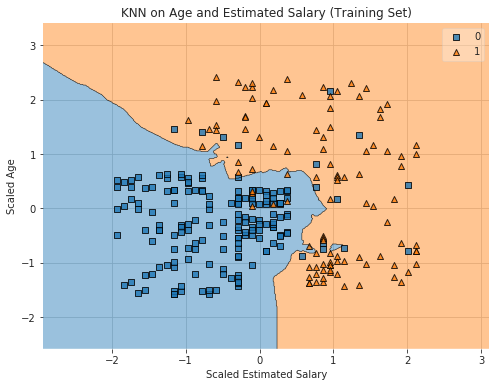

In [57]:
X_set, y_set = X_train.iloc[:,:2], y_train
plt.figure(figsize = (8,6))
plot_decision_regions(np.array(X_set), np.array(y_set), clf = classif_nogen)
plt.xlabel("Scaled Estimated Salary")
plt.ylabel("Scaled Age")
plt.title("KNN on Age and Estimated Salary (Training Set)")

Text(0.5, 1.0, 'KNN on Age and Estimated Salary (Test Set)')

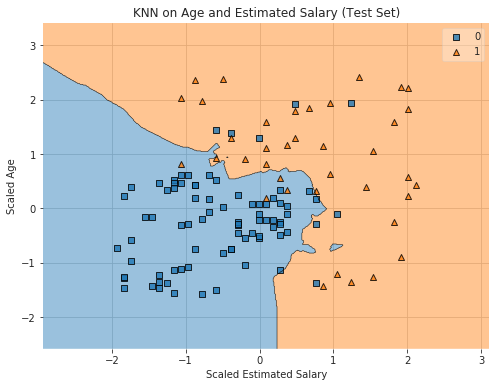

In [58]:
X_set, y_set = X_test.iloc[:,:2], y_test
plt.figure(figsize = (8,6))
plot_decision_regions(np.array(X_set), np.array(y_set), clf = classif_nogen)
plt.xlabel("Scaled Estimated Salary")
plt.ylabel("Scaled Age")
plt.title("KNN on Age and Estimated Salary (Test Set)")

## Support Vector Machines (SVM)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Age                400 non-null float64
EstimatedSalary    400 non-null float64
Gender_Male        400 non-null uint8
Purchased          400 non-null int64
dtypes: float64(2), int64(2), uint8(1)
memory usage: 13.0 KB


In [60]:
data.head()

,User ID,Age,EstimatedSalary,Gender_Male,Purchased
0,15624510,19.0,19000.0,1,0
1,15810944,35.0,20000.0,1,0
2,15668575,26.0,43000.0,0,0
3,15603246,27.0,57000.0,0,0
4,15804002,19.0,76000.0,1,0


In [61]:
X = data.iloc[:,1:4]
y = data.iloc[:,-1]

### Train Test Split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 84)

### Feature Scaling

In [63]:
scal_x = StandardScaler()

In [64]:
Male_train = X_train["Gender_Male"]
Male_test = X_test["Gender_Male"]

In [65]:
X_train = X_train.drop("Gender_Male", axis = 1)
X_test = X_test.drop("Gender_Male", axis = 1)

In [66]:
X_train = pd.DataFrame(scal_x.fit_transform(X_train), columns = ["Age", "EstimatedSalary"])
X_train.insert(2, column = "Gender_Male", value = Male_train.values)
X_train.head()

,Age,EstimatedSalary,Gender_Male
0,-0.295490,-0.221478,1
1,0.956643,-1.051490,1
2,-0.969715,-0.932916,0
3,0.186100,-0.340051,1
4,-0.199172,-0.488267,1


In [67]:
X_test = pd.DataFrame(scal_x.transform(X_test), columns = ["Age", "EstimatedSalary"])
X_test.insert(2, column = "Gender_Male", value = Male_test.values)
X_test.head()

,Age,EstimatedSalary,Gender_Male
0,-1.258669,0.341745,1
1,0.282418,0.104598,0
2,-0.873397,0.430675,0
3,-1.066033,0.816037,0
4,-1.066033,0.608534,1


### Fitting the Model(s)

I'll first be fitting a linear kernal, but I will also create a model with the default gaussian kernal for comparison. I'll also create a linear kernal model which does not include the gender variable.

In [68]:
from sklearn.svm import SVC

In [69]:
classif = SVC(kernel = "linear")
classif_nogen = SVC(kernel = "linear")
classif_gaus = SVC()

In [70]:
classif.fit(X_train, y_train)
classif_nogen.fit(X_train.iloc[:,:-1], y_train)
classif_gaus.fit(X_train.iloc[:,:-1], y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### Predicting the Model(s)

In [71]:
preds_nogen = classif_nogen.predict(X_test.iloc[:,:-1])
print(classification_report(y_test, preds_nogen))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        82
           1       0.76      0.76      0.76        38

    accuracy                           0.85       120
   macro avg       0.83      0.83      0.83       120
weighted avg       0.85      0.85      0.85       120



In [72]:
pd.crosstab(y_test, preds_nogen)

col_0,0,1
Purchased,,
0,73,9
1,9,29


In [73]:
preds = classif.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        82
           1       0.76      0.76      0.76        38

    accuracy                           0.85       120
   macro avg       0.83      0.83      0.83       120
weighted avg       0.85      0.85      0.85       120



In [74]:
pd.crosstab(y_test, preds)

col_0,0,1
Purchased,,
0,73,9
1,9,29


In [75]:
preds_gaus = classif_gaus.predict(X_test.iloc[:,:-1])
print(classification_report(y_test, preds_gaus))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        82
           1       0.79      0.87      0.82        38

    accuracy                           0.88       120
   macro avg       0.86      0.88      0.87       120
weighted avg       0.89      0.88      0.88       120



In [76]:
pd.crosstab(y_test, preds_gaus)

col_0,0,1
Purchased,,
0,73,9
1,5,33


It appears that the to linear models preformed identically, regardless of the inclusion of the gender variable. The model with the gaussian kernal outpreformed both linear models.

### Visualizing the Model(s)

#### Visualizing the Linear Kernal (No Gender)

Text(0.5, 1.0, 'SVM on Age and Estimated Salary (Training Set)')

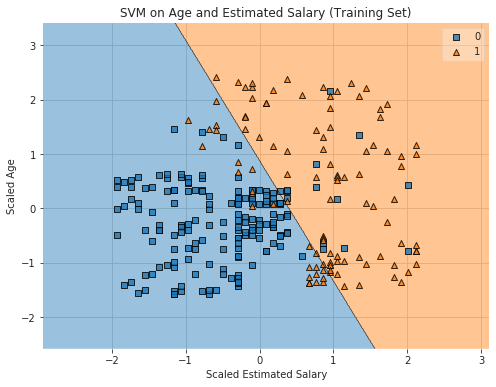

In [77]:
X_set, y_set = X_train.iloc[:,:2], y_train
plt.figure(figsize = (8,6))
plot_decision_regions(np.array(X_set), np.array(y_set), clf = classif_nogen)
plt.xlabel("Scaled Estimated Salary")
plt.ylabel("Scaled Age")
plt.title("SVM on Age and Estimated Salary (Training Set)")

Text(0.5, 1.0, 'SVM on Age and Estimated Salary (Test Set)')

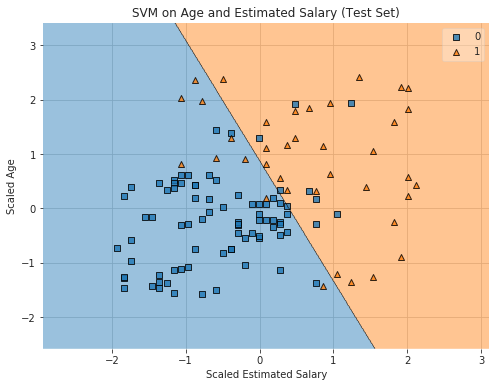

In [78]:
X_set, y_set = X_test.iloc[:,:2], y_test
plt.figure(figsize = (8,6))
plot_decision_regions(np.array(X_set), np.array(y_set), clf = classif_nogen)
plt.xlabel("Scaled Estimated Salary")
plt.ylabel("Scaled Age")
plt.title("SVM on Age and Estimated Salary (Test Set)")

#### Visualizing the Gaussian Kernal

Text(0.5, 1.0, 'SVM on Age and Estimated Salary (Training Set)')

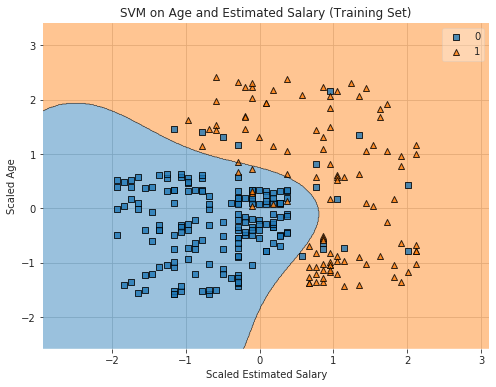

In [79]:
X_set, y_set = X_train.iloc[:,:2], y_train
plt.figure(figsize = (8,6))
plot_decision_regions(np.array(X_set), np.array(y_set), clf = classif_gaus)
plt.xlabel("Scaled Estimated Salary")
plt.ylabel("Scaled Age")
plt.title("SVM on Age and Estimated Salary (Training Set)")

Text(0.5, 1.0, 'SVM on Age and Estimated Salary (Test Set)')

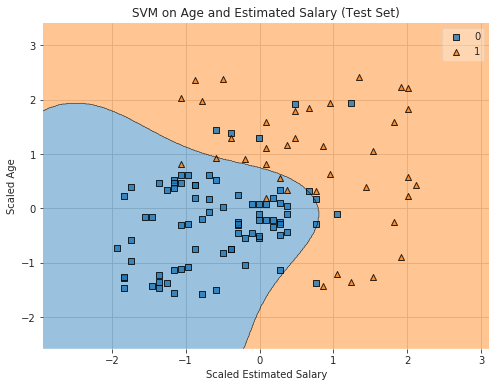

In [80]:
X_set, y_set = X_test.iloc[:,:2], y_test
plt.figure(figsize = (8,6))
plot_decision_regions(np.array(X_set), np.array(y_set), clf = classif_gaus)
plt.xlabel("Scaled Estimated Salary")
plt.ylabel("Scaled Age")
plt.title("SVM on Age and Estimated Salary (Test Set)")

## Naive Bayes Classification

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Age                400 non-null float64
EstimatedSalary    400 non-null float64
Gender_Male        400 non-null uint8
Purchased          400 non-null int64
dtypes: float64(2), int64(2), uint8(1)
memory usage: 13.0 KB


In [82]:
data.head()

,User ID,Age,EstimatedSalary,Gender_Male,Purchased
0,15624510,19.0,19000.0,1,0
1,15810944,35.0,20000.0,1,0
2,15668575,26.0,43000.0,0,0
3,15603246,27.0,57000.0,0,0
4,15804002,19.0,76000.0,1,0


In [83]:
X = data.iloc[:,1:4]
y = data.iloc[:,-1]

### Train Test Split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 84)

### Feature Scaling

In [85]:
scal_x = StandardScaler()

In [86]:
Male_train = X_train["Gender_Male"]
Male_test = X_test["Gender_Male"]

In [87]:
X_train = X_train.drop("Gender_Male", axis = 1)
X_test = X_test.drop("Gender_Male", axis = 1)

In [88]:
X_train = pd.DataFrame(scal_x.fit_transform(X_train), columns = ["Age", "EstimatedSalary"])
X_train.insert(2, column = "Gender_Male", value = Male_train.values)
X_train.head()

,Age,EstimatedSalary,Gender_Male
0,-0.295490,-0.221478,1
1,0.956643,-1.051490,1
2,-0.969715,-0.932916,0
3,0.186100,-0.340051,1
4,-0.199172,-0.488267,1


In [89]:
X_test = pd.DataFrame(scal_x.transform(X_test), columns = ["Age", "EstimatedSalary"])
X_test.insert(2, column = "Gender_Male", value = Male_test.values)
X_test.head()

,Age,EstimatedSalary,Gender_Male
0,-1.258669,0.341745,1
1,0.282418,0.104598,0
2,-0.873397,0.430675,0
3,-1.066033,0.816037,0
4,-1.066033,0.608534,1


### Fitting the Model

In [90]:
from sklearn.naive_bayes import GaussianNB

In [91]:
classif = GaussianNB()
classif_nogen = GaussianNB()

In [92]:
classif_nogen.fit(X_train.iloc[:,:2], y_train)
classif.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### Predictions

In [93]:
preds = classif.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91        82
           1       0.81      0.79      0.80        38

    accuracy                           0.88       120
   macro avg       0.86      0.85      0.85       120
weighted avg       0.87      0.88      0.87       120



In [94]:
pd.crosstab(y_test, preds)

col_0,0,1
Purchased,,
0,75,7
1,8,30


In [95]:
preds_nogen = classif_nogen.predict(X_test.iloc[:,:2])
print(classification_report(y_test, preds_nogen))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90        82
           1       0.77      0.79      0.78        38

    accuracy                           0.86       120
   macro avg       0.84      0.84      0.84       120
weighted avg       0.86      0.86      0.86       120



In [96]:
pd.crosstab(y_test, preds_nogen)

col_0,0,1
Purchased,,
0,73,9
1,8,30


### Visualizing the Model(s)

Text(0.5, 1.0, 'Naive Bayes on Age and Estimated Salary (Training Set)')

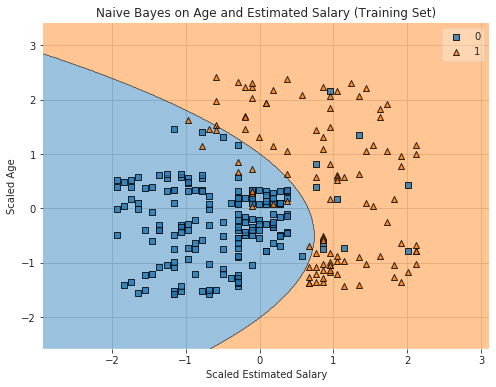

In [97]:
X_set, y_set = X_train.iloc[:,:2], y_train
plt.figure(figsize = (8,6))
plot_decision_regions(np.array(X_set), np.array(y_set), clf = classif_nogen)
plt.xlabel("Scaled Estimated Salary")
plt.ylabel("Scaled Age")
plt.title("Naive Bayes on Age and Estimated Salary (Training Set)")

Text(0.5, 1.0, 'Naive Bayes on Age and Estimated Salary (Test Set)')

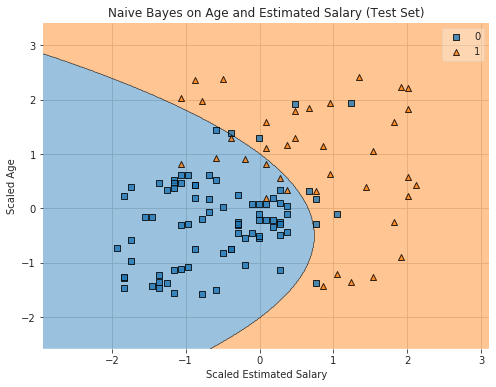

In [98]:
X_set, y_set = X_test.iloc[:,:2], y_test
plt.figure(figsize = (8,6))
plot_decision_regions(np.array(X_set), np.array(y_set), clf = classif_nogen)
plt.xlabel("Scaled Estimated Salary")
plt.ylabel("Scaled Age")
plt.title("Naive Bayes on Age and Estimated Salary (Test Set)")

## Decision Tree

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Age                400 non-null float64
EstimatedSalary    400 non-null float64
Gender_Male        400 non-null uint8
Purchased          400 non-null int64
dtypes: float64(2), int64(2), uint8(1)
memory usage: 13.0 KB


In [100]:
data.head()

,User ID,Age,EstimatedSalary,Gender_Male,Purchased
0,15624510,19.0,19000.0,1,0
1,15810944,35.0,20000.0,1,0
2,15668575,26.0,43000.0,0,0
3,15603246,27.0,57000.0,0,0
4,15804002,19.0,76000.0,1,0


In [101]:
X = data.iloc[:,1:4]
y = data.iloc[:,-1]

### Train Test Split

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 84)

### Fitting the Tree

In [103]:
from sklearn.tree import DecisionTreeClassifier

In [104]:
classif = DecisionTreeClassifier(criterion="entropy")
classif_nogen = DecisionTreeClassifier(criterion="entropy")

In [112]:
classif.fit(X_train, y_train)
classif_nogen.fit(X_train.iloc[:,:2], y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Predictions

In [113]:
preds = classif.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91        82
           1       0.79      0.82      0.81        38

    accuracy                           0.88       120
   macro avg       0.85      0.86      0.86       120
weighted avg       0.88      0.88      0.88       120



In [114]:
pd.crosstab(y_test, preds)

col_0,0,1
Purchased,,
0,74,8
1,7,31


In [117]:
preds_nogen = classif_nogen.predict(X_test.iloc[:,:2])
print(classification_report(y_test, preds_nogen))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91        82
           1       0.80      0.84      0.82        38

    accuracy                           0.88       120
   macro avg       0.86      0.87      0.87       120
weighted avg       0.89      0.88      0.88       120



In [118]:
pd.crosstab(y_test, preds_nogen)

col_0,0,1
Purchased,,
0,74,8
1,6,32


### Visualizing the Decision Boundry of the Tree

Text(0.5, 1.0, 'Decision Tree on Age and Estimated Salary (Training Set)')

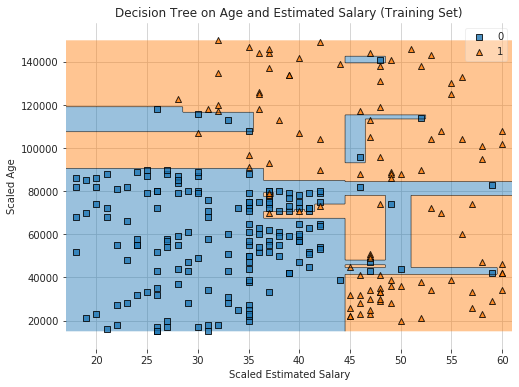

In [119]:
X_set, y_set = X_train.iloc[:,:2], y_train
plt.figure(figsize = (8,6))
plot_decision_regions(np.array(X_set), np.array(y_set), clf = classif_nogen)
plt.xlabel("Scaled Estimated Salary")
plt.ylabel("Scaled Age")
plt.title("Decision Tree on Age and Estimated Salary (Training Set)")

Text(0.5, 1.0, 'Decision Tree on Age and Estimated Salary (Test Set)')

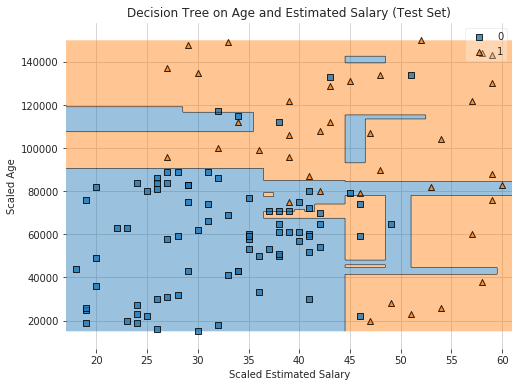

In [121]:
X_set, y_set = X_test.iloc[:,:2], y_test
plt.figure(figsize = (8,6))
plot_decision_regions(np.array(X_set), np.array(y_set), clf = classif_nogen)
plt.xlabel("Scaled Estimated Salary")
plt.ylabel("Scaled Age")
plt.title("Decision Tree on Age and Estimated Salary (Test Set)")

## Random Forest Classifier

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Age                400 non-null float64
EstimatedSalary    400 non-null float64
Gender_Male        400 non-null uint8
Purchased          400 non-null int64
dtypes: float64(2), int64(2), uint8(1)
memory usage: 13.0 KB


In [123]:
data.head()

,User ID,Age,EstimatedSalary,Gender_Male,Purchased
0,15624510,19.0,19000.0,1,0
1,15810944,35.0,20000.0,1,0
2,15668575,26.0,43000.0,0,0
3,15603246,27.0,57000.0,0,0
4,15804002,19.0,76000.0,1,0


In [124]:
X = data.iloc[:,1:4]
y = data.iloc[:,-1]

### Train Test Split

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 84)

### Feature Scaling

In [126]:
scal_x = StandardScaler()

In [127]:
Male_train = X_train["Gender_Male"]
Male_test = X_test["Gender_Male"]

In [128]:
X_train = X_train.drop("Gender_Male", axis = 1)
X_test = X_test.drop("Gender_Male", axis = 1)

In [129]:
X_train = pd.DataFrame(scal_x.fit_transform(X_train), columns = ["Age", "EstimatedSalary"])
X_train.insert(2, column = "Gender_Male", value = Male_train.values)
X_train.head()

,Age,EstimatedSalary,Gender_Male
0,-0.295490,-0.221478,1
1,0.956643,-1.051490,1
2,-0.969715,-0.932916,0
3,0.186100,-0.340051,1
4,-0.199172,-0.488267,1


In [130]:
X_test = pd.DataFrame(scal_x.transform(X_test), columns = ["Age", "EstimatedSalary"])
X_test.insert(2, column = "Gender_Male", value = Male_test.values)
X_test.head()

,Age,EstimatedSalary,Gender_Male
0,-1.258669,0.341745,1
1,0.282418,0.104598,0
2,-0.873397,0.430675,0
3,-1.066033,0.816037,0
4,-1.066033,0.608534,1


### Fitting the Model

I'll be building four forests; the full and "no gender" models with the default parameters, and those same models with n_estimators = 300.

In [131]:
from sklearn.ensemble import RandomForestClassifier

In [148]:
classif = RandomForestClassifier(criterion = "entropy")
classif_nogen = RandomForestClassifier(criterion = "entropy")
classif_300 = RandomForestClassifier(n_estimators=300, criterion = "entropy")
classif_nogen_300 = RandomForestClassifier(n_estimators=300, criterion = "entropy")

In [149]:
classif.fit(X_train, y_train)
classif_300.fit(X_train, y_train)
classif_nogen.fit(X_train.iloc[:,:-1], y_train)
classif_nogen_300.fit(X_train.iloc[:,:-1], y_train)

/home/anna/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anna/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Predictions

In [150]:
preds = classif.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90        82
           1       0.78      0.76      0.77        38

    accuracy                           0.86       120
   macro avg       0.84      0.83      0.84       120
weighted avg       0.86      0.86      0.86       120



In [151]:
pd.crosstab(y_test, preds)

col_0,0,1
Purchased,,
0,74,8
1,9,29


In [152]:
preds_300 = classif_300.predict(X_test)
print(classification_report(y_test, preds_300))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90        82
           1       0.77      0.79      0.78        38

    accuracy                           0.86       120
   macro avg       0.84      0.84      0.84       120
weighted avg       0.86      0.86      0.86       120



In [153]:
pd.crosstab(y_test, preds_300)

col_0,0,1
Purchased,,
0,73,9
1,8,30


In [154]:
preds_nogen = classif_nogen.predict(X_test.iloc[:,:-1])
print(classification_report(y_test, preds_nogen))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91        82
           1       0.81      0.79      0.80        38

    accuracy                           0.88       120
   macro avg       0.86      0.85      0.85       120
weighted avg       0.87      0.88      0.87       120



In [155]:
pd.crosstab(y_test, preds_nogen)

col_0,0,1
Purchased,,
0,75,7
1,8,30


In [156]:
preds_nogen_300 = classif_nogen_300.predict(X_test.iloc[:,:-1])
print(classification_report(y_test, preds_nogen_300))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91        82
           1       0.79      0.82      0.81        38

    accuracy                           0.88       120
   macro avg       0.85      0.86      0.86       120
weighted avg       0.88      0.88      0.88       120



In [157]:
pd.crosstab(y_test, preds_nogen_300)

col_0,0,1
Purchased,,
0,74,8
1,7,31


### Visualizing the Decision Boundry of the Forests

#### Visualizing the Forest with 10 Trees

Text(0.5, 1.0, 'Random Forest on Age and Estimated Salary (Training Set)')

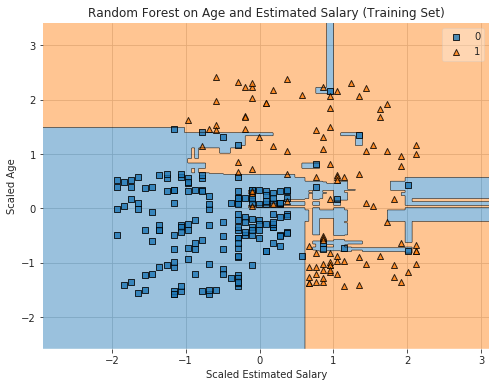

In [158]:
X_set, y_set = X_train.iloc[:,:2], y_train
plt.figure(figsize = (8,6))
plot_decision_regions(np.array(X_set), np.array(y_set), clf = classif_nogen)
plt.xlabel("Scaled Estimated Salary")
plt.ylabel("Scaled Age")
plt.title("Random Forest on Age and Estimated Salary (Training Set)")

Text(0.5, 1.0, 'Random Forest on Age and Estimated Salary (Test Set)')

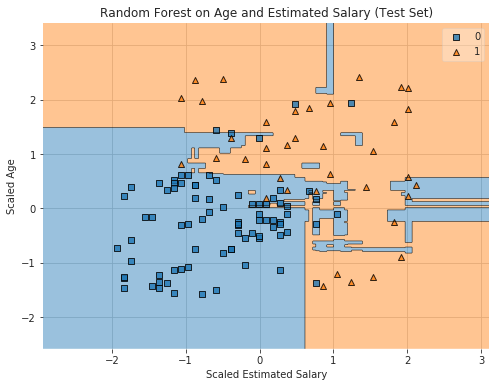

In [159]:
X_set, y_set = X_test.iloc[:,:2], y_test
plt.figure(figsize = (8,6))
plot_decision_regions(np.array(X_set), np.array(y_set), clf = classif_nogen)
plt.xlabel("Scaled Estimated Salary")
plt.ylabel("Scaled Age")
plt.title("Random Forest on Age and Estimated Salary (Test Set)")

#### Visualizing the Forest with 300 Trees

Text(0.5, 1.0, 'Random Forest on Age and Estimated Salary (Training Set - 300 Trees)')

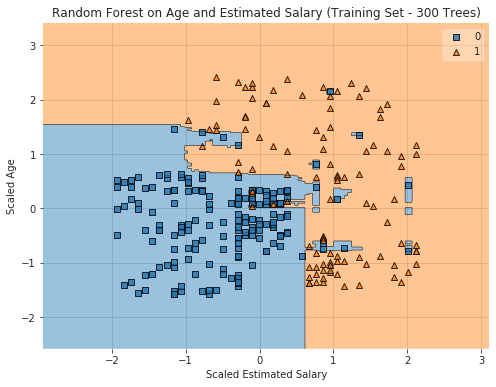

In [160]:
X_set, y_set = X_train.iloc[:,:2], y_train
plt.figure(figsize = (8,6))
plot_decision_regions(np.array(X_set), np.array(y_set), clf = classif_nogen_300)
plt.xlabel("Scaled Estimated Salary")
plt.ylabel("Scaled Age")
plt.title("Random Forest on Age and Estimated Salary (Training Set - 300 Trees)")

Text(0.5, 1.0, 'Random Forest on Age and Estimated Salary (Test Set - 300 Trees)')

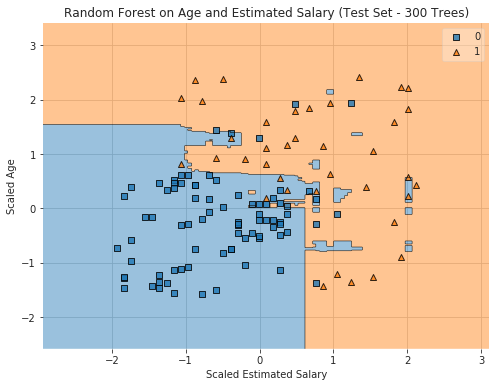

In [161]:
X_set, y_set = X_test.iloc[:,:2], y_test
plt.figure(figsize = (8,6))
plot_decision_regions(np.array(X_set), np.array(y_set), clf = classif_nogen_300)
plt.xlabel("Scaled Estimated Salary")
plt.ylabel("Scaled Age")
plt.title("Random Forest on Age and Estimated Salary (Test Set - 300 Trees)")